In [8]:
import pandas as pd

file_path_ts = "../data_science1_hw_1_4/data/time_series_data.csv"
df_ts = pd.read_csv(file_path_ts)

In [9]:
df_ts.head()

,Date,value
0,2023-01-01,52.274599
1,2023-01-02,63.071428
2,2023-01-03,33.925168
3,2023-01-04,51.846339
4,2023-01-05,52.598828


In [10]:
df_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    365 non-null    object 
 1   value   365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


현재는 Datetime이 object이기때문에 활용하기 쉽지 않음
to_datetime함수를 이용해서 datetime 형식으로 변환하자. 

In [11]:
# 날짜데이터를 datatime 형식으로 변환
df_ts["Date"] = pd.to_datetime(df_ts["Date"])

#데이터정렬
df_ts = df_ts.sort_values(by="Date")

#전체데이터의 기본통계량 확인 (데이터분포파악)
summary_stats = df_ts["value"].describe()

#기본통계량 출력
print("전체 데이터의 기본 통계량:")
print(summary_stats)

전체 데이터의 기본 통계량:
count    365.000000
mean      50.452941
std        9.976651
min       17.587327
25%       42.923305
50%       50.642800
75%       56.795977
max       88.527315
Name: value, dtype: float64


In [18]:
# 특정 기간 비교: 연초(1월)와 연말(12월)의 평균 비교
# "Date"컬럼에서 월 정보를 추출하여 새로운 컬럼 추가
df_ts["Month"] = df_ts["Date"].dt.month

df_ts.head()

,Date,value,Month
0,2023-01-01,52.274599,1
1,2023-01-02,63.071428,1
2,2023-01-03,33.925168,1
3,2023-01-04,51.846339,1
4,2023-01-05,52.598828,1


In [21]:
# 1월과 12월 데이터만 선택
# - 1월 데이터를 `jan_values` 변수에 저장
# - 12월 데이터를 `dec_values` 변수에 저장
jan_values = df_ts[df_ts["Month"] == 1]["value"]
dec_values = df_ts[df_ts["Month"] == 12]["value"]

# 1월과 12월의 평균 값 계산
jan_mean = jan_values.mean()
dec_mean = dec_values.mean()

print(jan_values.head())
print()
print(jan_mean)


0    52.274599
1    63.071428
2    33.925168
3    51.846339
4    52.598828
Name: value, dtype: float64

51.06594006805506


In [ ]:
# 1월과 12월 평균 출력
print("\n1월과 12월의 평균 비교:")
print(f"1월 평균: {jan_mean:.2f}")
print(f"12월 평균: {dec_mean:.2f}")


1월과 12월의 평균 비교:
1월 평균: 51.07
12월 평균: 51.06


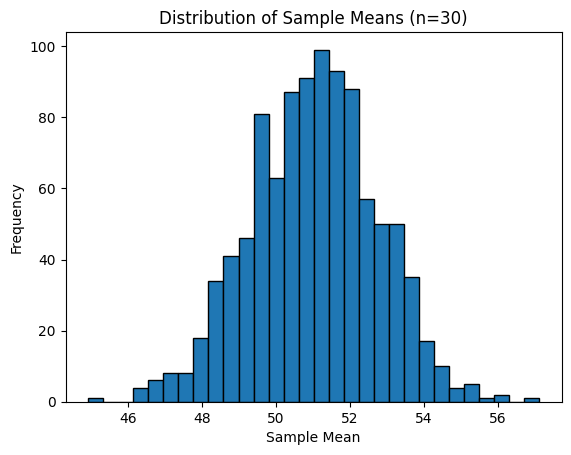

In [22]:
# 표본 평균의 분포를 살펴봅시다.
# 1월 데이터에서 표본 크기 n=30을 무작위로 여러 번 뽑아,
# 각 표본 평균을 구한 뒤 히스토그램으로 표현하세요.
# ----------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt

sample_means = []
for _ in range(1000):  # 1000번 반복
    sample = np.random.choice(jan_values, size=30, replace=True)
    sample_means.append(sample.mean())

plt.hist(sample_means, bins=30, edgecolor="black")
plt.title("Distribution of Sample Means (n=30)")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.show()

In [24]:
threshold = np.percentile(dec_values, 80)  # 상위 20% 기준
threshold

np.float64(61.195749114345766)

In [25]:
# 12월 데이터에서 상위 20% 값만 뽑아 평균을 구하고,
# 전체 평균과 비교해 보세요.
# 어떤 편향이 발생하는지도 함께 설명해봅시다.
# ----------------------------------------------------
threshold = np.percentile(dec_values, 80)  # 상위 20% 기준
biased_sample = dec_values[dec_values >= threshold ]

biased_mean = biased_sample.mean()
true_mean = dec_values.mean()

print("\n선택 편향 시뮬레이션:")
print(f"12월 전체 평균: {true_mean:.2f}")
print(f"12월 상위 20% 평균: {biased_mean:.2f}")
print("→ 상위 데이터만 선택하면 평균이 왜곡되어 모집단을 대표하지 못하는 선택 편향 발생")


선택 편향 시뮬레이션:
12월 전체 평균: 51.06
12월 상위 20% 평균: 67.78
→ 상위 데이터만 선택하면 평균이 왜곡되어 모집단을 대표하지 못하는 선택 편향 발생
